# Simple Moving Average (SMA)

The [SMA filter](https://en.wikipedia.org/wiki/Moving_average#Simple_moving_average) can be used for removing noise from a data set and producing a smooth curve, for example.

### Import the required stuff

In [1]:
# plot the figures at the notebook
%matplotlib inline

import numpy as np

import sma_functions as sf

### Create a dataset

In [2]:
# number of data
ndata = 200

In [3]:
# coordinates
x = np.linspace(0., 2*np.pi, ndata)

# noise-free data
data = 0.4*np.sin(x) + 0.5*np.cos(3*x)

# noisy data
data_noisy = data + np.random.normal(loc=0., scale=0.1, size=ndata)

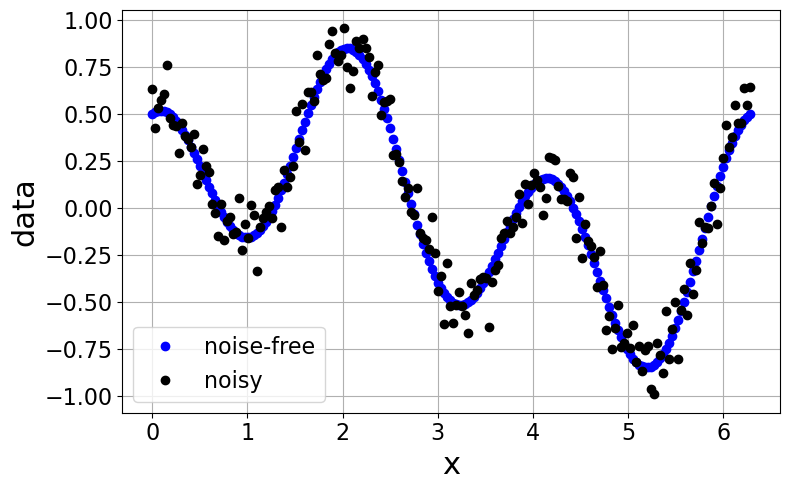

In [4]:
sf.plot(x=x, y=data, z=data_noisy, labely='noise-free', labelz='noisy')

In [5]:
sf.plot?

Signature: sf.plot(x, y, z=None, w=None, labely=None, labelz=None, labelw=None)
Docstring:
Plot superposed graphs of y, z and w against x.

input
x: numpy array 1D - abscissa values.
y: numpy array 1D - ordinate values of the first data set.
z: numpy array 1D - ordinate values of the second data
   set (default is None).
w: numpy array 1D - ordinate values of the third data
   set (default is None).
labely: string - label of the first data set (default is None).
labelz: string - label of the second data set (default is None).
labelw: string - label of the third data set (default is None).

output
matplotlib figure
File:      ~/Documents/Repositorios/Disciplina-metodos-computacionais/Content/elements_Python/SMA/sma_functions.py
Type:      function

### SMA filter

In [6]:
# consider windows with odd sizes and greater than 3
window_size = 5

In [7]:
filtered_data = sf.sma1d(data_noisy, window_size)

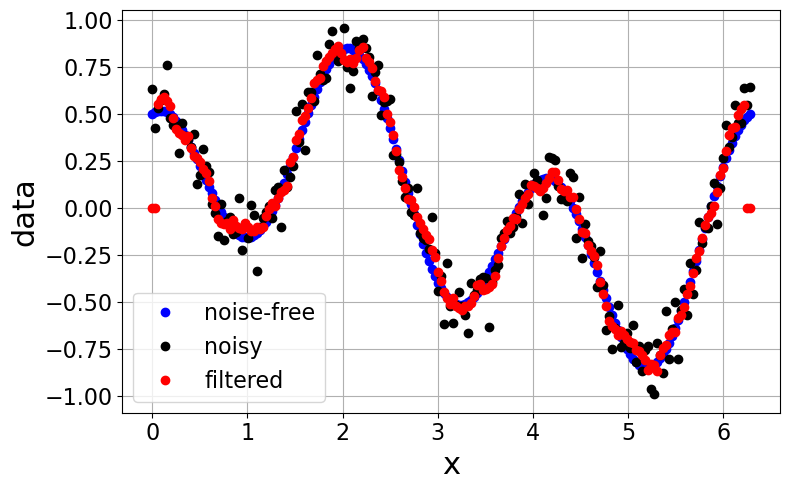

In [8]:
sf.plot(x=x, y=data, z=data_noisy, w=filtered_data,
        labely='noise-free', labelz='noisy', labelw='filtered')

### Testing

We will use basically 3 functions:

* [`assert`](https://realpython.com/python-testing/#unit-tests-vs-integration-tests)
* [`numpy.testing.assert_almost_equal`](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_almost_equal.html)
* [`pytest.raises`](https://docs.pytest.org/en/6.2.x/reference.html#pytest-raises)

In [9]:
from numpy.testing import assert_almost_equal
from pytest import raises

#### [`assert statement`](https://realpython.com/python-testing/#unit-tests-vs-integration-tests)

    assert condition-that-must-be-true, 'error message'

In [10]:
variable = 5

In [11]:
assert variable%2 == 0, 'variable should be even'

AssertionError: variable should be even

In [12]:
variable = 4

In [13]:
assert variable%2 == 0, 'variable should be even'

In [14]:
# create invalid input
data_test = np.arange(5)
window = 6

In [15]:
# run the code with the invalid input
sf.sma1d(data_test, window)

AssertionError: data must have more elements than window_size

#### [`numpy.testing.assert_almost_equal`](https://numpy.org/doc/stable/reference/generated/numpy.testing.assert_almost_equal.html)

In [16]:
variable = 1.33335

In [17]:
assert_almost_equal(variable, 1.33333, decimal=5)

AssertionError: 
Arrays are not almost equal to 5 decimals
 ACTUAL: 1.33335
 DESIRED: 1.33333

In [18]:
assert_almost_equal(variable, 1.33333, decimal=4)

In [19]:
coordinates = np.arange(15)
specific_input = np.ones(15)

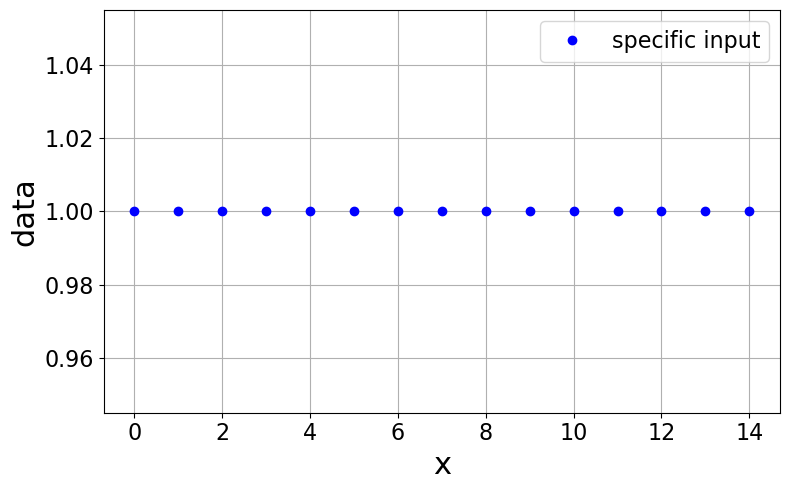

In [20]:
sf.plot(x=coordinates, y=specific_input, labely='specific input')

In [21]:
# True output for a window size 5
output_true = np.ones_like(specific_input)
output_true[0:2:1] = 0
output_true[-1:-3:-1] = 0

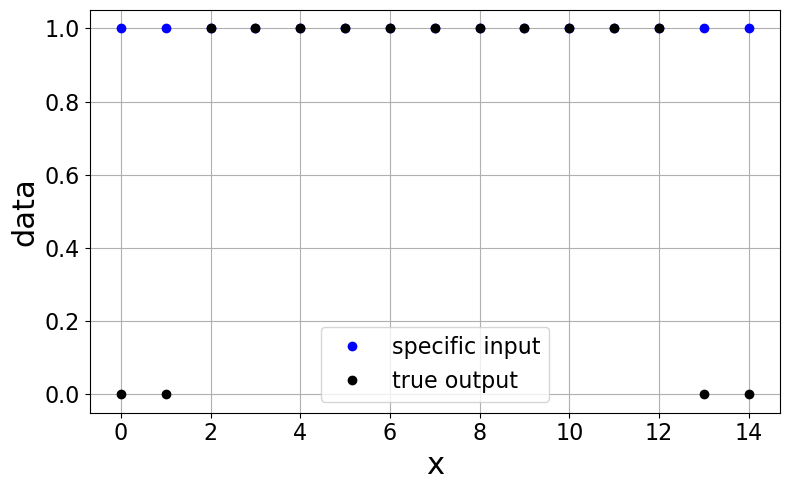

In [22]:
sf.plot(x=coordinates, y=specific_input, z=output_true, labely='specific input', labelz='true output')

In [23]:
output_calculated = sf.sma1d(specific_input, 5)

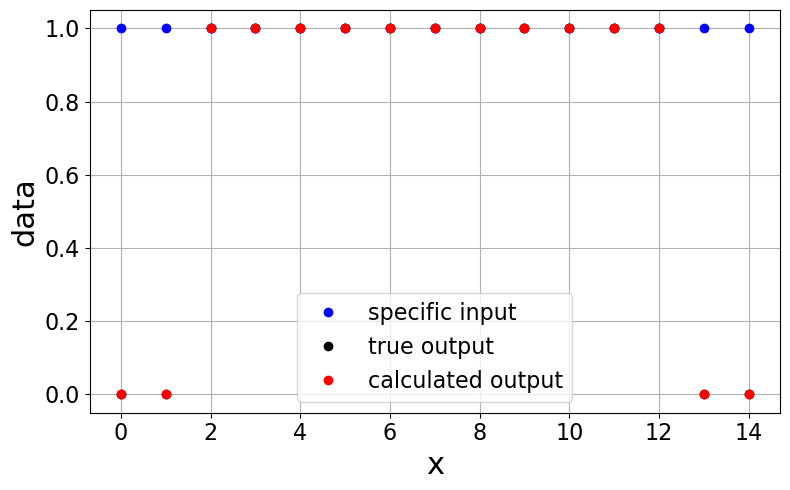

In [24]:
sf.plot(x=coordinates, y=specific_input, z=output_true, w=output_calculated,
        labely='specific input', labelz='true output', labelw='calculated output')

In [25]:
assert_almost_equal(output_calculated, output_true, decimal=15)

Note that, apparently, the testing function `assert_almost_equal` didn't anything

In [26]:
output_error = np.copy(output_calculated)
#output_error[-1] = 9
output_error[5:8] -= 0.2

In [27]:
output_error

array([0. , 0. , 1. , 1. , 1. , 0.8, 0.8, 0.8, 1. , 1. , 1. , 1. , 1. ,
       0. , 0. ])

In [28]:
output_calculated

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [29]:
output_true

array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

In [30]:
assert_almost_equal(output_error, output_true, decimal=15)

AssertionError: 
Arrays are not almost equal to 15 decimals

Mismatched elements: 3 / 15 (20%)
Max absolute difference: 0.2
Max relative difference: 0.2
 x: array([0. , 0. , 1. , 1. , 1. , 0.8, 0.8, 0.8, 1. , 1. , 1. , 1. , 1. ,
       0. , 0. ])
 y: array([0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0.])

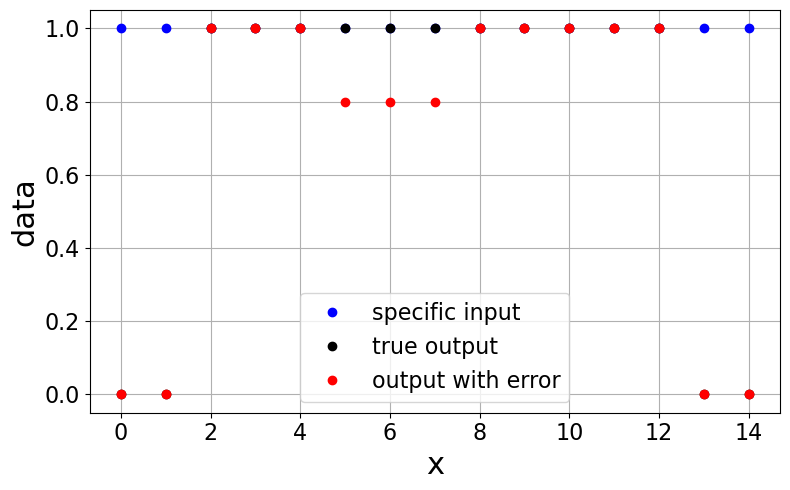

In [31]:
sf.plot(x=coordinates, y=specific_input, z=output_true, w=output_error,
        labely='specific input', labelz='true output', labelw='output with error')

#### [`pytest.raises`](https://docs.pytest.org/en/6.2.x/reference.html#pytest-raises)

In [32]:
# create valid input
data_test = np.arange(5)
window = 3

In [33]:
raises(AssertionError, sf.sma1d, data=data_test, window_size=window)

Failed: DID NOT RAISE <class 'AssertionError'>

In [34]:
# create invalid input with window size greater than data size
data_test = np.arange(5)
window = 7

In [35]:
raises(AssertionError, sf.sma1d, data=data_test, window_size=window)

<ExceptionInfo AssertionError('data must have more elements than window_size') tblen=2>

#### Put your tests in a separated file

These are simple tests to validate our code. In complex situations, however, we are not able to use tests like these. In such situations, we may use automated tests. Here, we run automated tests with [pytest](https://docs.pytest.org/en/latest/index.html). Take a look at the file `test_sma.py`. It contains three automated tests. To run these tests, execute the command bellow (by using Windows cmd, Linux terminal, or Git Bash, for example) in a directory containing both the files `my_funtions.py` and `test_sma.py`:

    `python -m pytest test_sma_functions.py` 